# Inaugural Project - MES

Overview over all the necessary packages that are required for solving the tasks.

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import warnings

from inauguralproject import HouseholdSpecializationModelClass
%reload_ext autoreload
%autoreload 2

# Question 1 - Illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$

The output of the model is $H_F$ and $H_M$. It represents the hours worked at home for male and female.
The (varying) inputs of the model are $\alpha$ and $\sigma$. $\alpha$ measures the importance of $H_F$ relative to $H_M$ in the overall home production. $\sigma$ is the elasticity of substitution.

Visualization of the dataFrame. The ratio of HF and HM is shown for varying alphas and sigmas. 
 
            alpha:0.25  alpha:0.5  alpha:0.75
sigma:0.5    0.545455        1.0    1.833333
sigma:1.0    0.307692        1.0    3.250000
sigma:1.5    0.214286        1.0    4.666667 



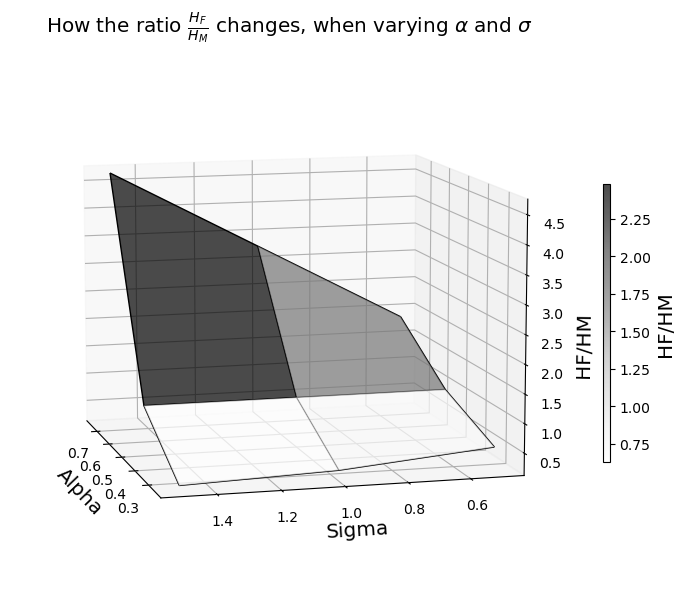

In [3]:
# Question 1

# A. Import the Household Specialisation Model from the .py files as 'model'
model = HouseholdSpecializationModelClass()


# B. Create seperate lists for varying alphas and sigmas
varying_alpha = [0.25, 0.50, 0.75] 
varying_sigma = [0.50, 1.0, 1.5] 


# C. Create empty lists for the optimal values of HF, HM and the ratio HF/HM
HF_star = []
HM_star = []
HF_divided_HM_star = []


# D. Solve the model for varying alphas and sigmas
# D.1 Solve the model for the varying alphas and sigmas
for i in varying_sigma:
    model.par.sigma = i # insert the varying sigma's as model parameter
    for j in varying_alpha:
        model.par.alpha = j # insert the varying alpha's as model parameter
        with warnings.catch_warnings(): # ignore warnings in the output
            warnings.filterwarnings("ignore")
            opt = model.solve_discrete() # solve the model 

        # D.2 Rename optimal solutions to HF and HM
        HF = opt.HF
        HM = opt.HM

        # D.3 Create the ratio
        HF_divided_HM = opt.HF/opt.HM 

        # D.4 Append the optimal solutions to the prior defined (empty) lists
        HF_star.append(HF)
        HM_star.append(HM)
        HF_divided_HM_star.append(HF_divided_HM)


# E. Create a DataFrame out of the results
# E.1 Split the list HF_divided_HM_star into three seperate lists (with three elements each)
chunk_size = 3 
chunks = [HF_divided_HM_star[i:i + chunk_size] for i in range(0, len(HF_divided_HM_star), chunk_size)] 

# E.2 Create the dataFrame (with the three seperate lists)
data1 = [chunks[0], chunks[1], chunks[2]]
dataFrame1 = pd.DataFrame(data1, columns = ['alpha:0.25', 'alpha:0.5', 'alpha:0.75'], index = ['sigma:0.5', 'sigma:1.0', 'sigma:1.5'])

# E.3 Print the DataFrame for the results
print('Visualization of the dataFrame. The ratio of HF and HM is shown for varying alphas and sigmas.', '\n', '\n', dataFrame1, '\n')


# F. Create a 3D plot of the results
# F.1 Convert the varying alpha and sigma lists into NumPy arrays
alpha_array = np.array(varying_alpha)
sigma_array = np.array(varying_sigma)

# F.2 Create a meshgrid from the alpha and sigma arrays
alpha_mesh, sigma_mesh = np.meshgrid(alpha_array, sigma_array)

# F.3 Convert the HF/HM list into a NumPy array and reshape it to match the meshgrid shape
hf_hm_array = np.array(HF_divided_HM_star).reshape(alpha_mesh.shape)

# F.4 Create a figure and axis
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

# F.5 Plot the surface with shading
ax.plot_wireframe(alpha_mesh, sigma_mesh, hf_hm_array, color='black', linewidth=1)
surface = ax.plot_surface(alpha_mesh, sigma_mesh, hf_hm_array, cmap='Greys', alpha=0.7, shade=True)
cbar = fig.colorbar(surface, ax=ax, shrink=0.4, aspect=40)
cbar.set_label('HF/HM', size='x-large')
ax.set_title(r"How the ratio $\frac{H_F}{H_M}$ changes, when varying $\alpha$ and $\sigma$", size='x-large')
ax.set_xlabel('Alpha', size='x-large')
ax.set_ylabel('Sigma', size='x-large')
ax.set_zlabel('HF/HM', size='x-large')
ax.view_init(elev=10, azim=165)
plt.show(block=False)

For an increasing $\alpha$, the home hours worked for female increase relative to the hours worked home by male. Thus, the ratio $\frac{H_F}{H_M}$ increases. 
For an increasing $\sigma$, the results are ambigious. If $\alpha$ is on a low level ($\alpha = 0.25$), then an increase in $\sigma$ results into a decrease in the ratio of $\frac{H_F}{H_M}$. If $\alpha$ is on a high level, then an increase in $\sigma$ results into an increase in $H_F$ relative to $H_M$.

# Question 2 - Plot $log \frac{H_F}{H_M}$ against $log \frac{w_F}{w_M}$ for varying $w_F$

Compared to Question 1, $\alpha$ and $\sigma$ are assumed to be fixed again at $\alpha = 0.5$ and $\sigma = 1$. Instead, $w_F$ varies discretely as input. $w_F$ corresponds to the female wages. Accordingly, the output $H_F$, $H_M$ and their ratio varies. 

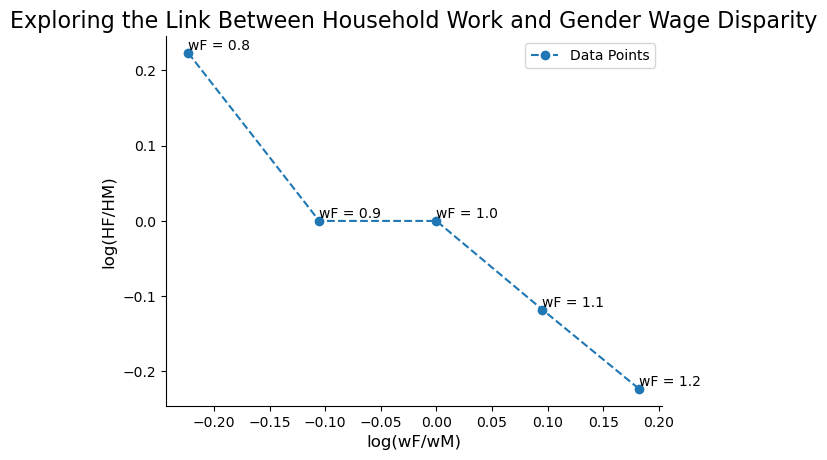

In [4]:
# Question 2
# A. Create an instance of the class
model = HouseholdSpecializationModelClass()


# B. Create empty lists for log HF/HM and log WF/WM
log_HF_HM = []
log_WF_WM = []


# C. Solve the Model discretely for varying wF
for wF in model.par.wF_vec:
   model.par.wF = wF
   with warnings.catch_warnings(): # ignore warnings in the output
         warnings.filterwarnings("ignore")
         discrete = model.solve_discrete() # solve the model 

   # C.1 Append the ratio of optimal solutions of HF and HM to the empty list
   log_HF_HM.append(math.log(discrete.HF / discrete.HM))

   # C.2 Append the ratio of input values of wF and wM to the empty list
   log_WF_WM.append(math.log(wF / 1))


# D. Create a Figure
# D.1 Plot the optimal ratios
plt.plot(log_WF_WM, log_HF_HM, 'o--', label='Data Points') 

# D.2 Create heading, axis labels and legend
plt.title('Exploring the Link Between Household Work and Gender Wage Disparity', fontsize=16)
plt.xlabel('log(wF/wM)', fontsize=12)
plt.ylabel('log(HF/HM)', fontsize=12)
plt.legend()

# D.3 Remove black box around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 

# D.4 Add data point values to the plot
for i, (x, y) in enumerate(zip(log_WF_WM, log_HF_HM)):
   wf_value = model.par.wF_vec[i]
   plt.text(x, y, f'wF = {wf_value}', ha='left', va='bottom')

# D.5 Show the plot
plt.show()

For assuming $w_M$ fixed, a discrete increase in $w_F$ results into an increased ratio for $log \frac{w_F}{w_M}$. The increased relative wage ratio means that female labor is less demanded than mens labor due the increased wages. Thus, mens home working hours increase relative to women home working hours. This translates into a decreasing ratio $log \frac{H_F}{H_M}$.

# Question 3

Explain your code and procedure

The optimal values of LM, LF, HM, HF depending on wF
wF=0.8  -->  LM=5.889, LF=2.87, HM=4.093, HF=5.116
wF=0.9  -->  LM=5.168, LF=3.75, HM=4.271, HF=4.746
wF=1.0  -->  LM=4.455, LF=4.45, HM=4.455, HF=4.454
wF=1.1  -->  LM=3.760, LF=5.02, HM=4.642, HF=4.220
wF=1.2  -->  LM=3.090, LF=5.48, HM=4.833, HF=4.027

 
 The results as Dataframe
 wF       LM       LF       HM       HF
0.8 5.889247 2.869815 4.092548 5.115672
0.9 5.167743 3.749315 4.271034 4.745632
1.0 4.454502 4.454545 4.454509 4.454444
1.1 3.759784 5.021980 4.641950 4.219941
1.2 3.089705 5.479613 4.832678 4.027193

 
 The visualization of the log(HF/HM) against the log(wF/wM)


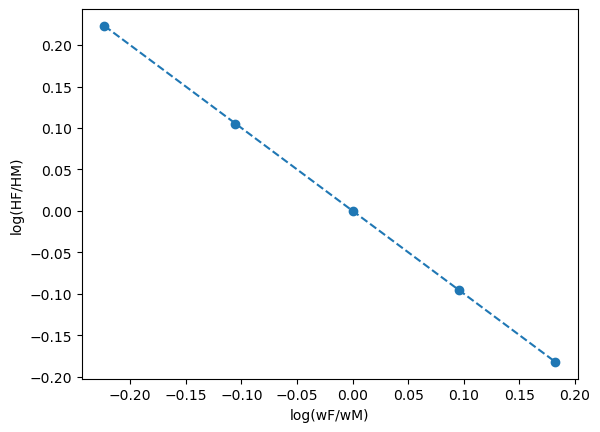

In [5]:
import matplotlib.pyplot as plt
# Question 3
# save the class as 'model'
model = HouseholdSpecializationModelClass()

# A. define an empty list to store the results from the upcoming for loop
optimal_values = []

# Printing a heading
print('The optimal values of LM, LF, HM, HF depending on wF')

# B. creating a for loop to solve the model for varying wF's
for wF in model.par.wF_vec:
    model.par.wF = wF
    model.solve_continous() # solve the model for the different values of wF
    optimal_values.append((wF, model.sol.LM, model.sol.LF, model.sol.HM, model.sol.HF)) # append the solutions to the empty list 'optimal_values'
    print(f"wF={wF:.1f}  -->  LM={model.sol.LM:.3f}, LF={model.sol.LF:.2f}, HM={model.sol.HM:.3f}, HF={model.sol.HF:.3f}") # printing the results

# C. Convert the results to a pandas DataFrame for easier manipulation
df = pd.DataFrame(optimal_values, columns=["wF", "LM", "LF", "HM", "HF"]) # create the dataFrame df with the results from above
print('\n', '\n', "The results as Dataframe") # Printing a header
print(df.to_string(index=False)) # printing the DataFrame with excluding the index column

# D. extract colums from Pandas Data Frame and store them as new lists
a1 = df['HF'].tolist()
a2 = df['HM'].tolist()
a3 = df['wF'].tolist()

# E. Take the logs of the ratios HF/HM and wF/wM
log_a1_a2 = [math.log(a1[i] / a2[i]) for i in range(len(a1))]
log_a3 = [math.log(a3[i]) for i in range(len(a3))]

# Plot the log ratios
plt.plot(log_a3, log_a1_a2, 'o--')
plt.ylabel("log(HF/HM)")
plt.xlabel("log(wF/wM)")
print('\n', '\n', 'The visualization of the log(HF/HM) against the log(wF/wM)') # Header
plt.show()

# Question 4

In [6]:
# Solution with changing alpha and sigma manually to get narrow bounds

model = HouseholdSpecializationModelClass()

#manually change alpha and sigma to narrow in bounds for optimizer
model.par.alpha = 0.9
model.par.sigma = 0.1

#create empty lists used later for plotting and to create numpy arrays
placeholder_HF = []
placeholder_HM = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    model.solve_continous() # solve the model for the different values of wF
    optimal_values.append((wF, model.sol.LM, model.sol.LF, model.sol.HM, model.sol.HF)) # append the solutions to the empty list 'optimal_values'
    placeholder_HF.append(model.sol.HF)
    placeholder_HM.append(model.sol.HM)

#create numpy arrays to feed into the regression function
k = np.array(placeholder_HF)
l = np.array(placeholder_HM)
model.sol.HF_vec = k
model.sol.HM_vec = l


print("We used manual inputs of alpha and sigma to narrow the bounds.")
print("For Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma, "we get the following betas:")

model.run_regression()

print("beta0: ", model.sol.beta0)
print("beta1: ", model.sol.beta1)





We used manual inputs of alpha and sigma to narrow the bounds.
For Alpha =  0.9 and Sigma =  0.1 we get the following betas:
beta0:  0.21972367798615558
beta1:  -0.09998660922252828


In [7]:
#Feed narrow bounds into optimizer:

bounds = ((0.9, 1), (0, 0.1))

model.estimate()

# Print the optimal values of alpha and sigma
print("The optimal values are: Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma)
print("We arrive at: beta0 = ", model.sol.beta0, "and beta1 = ", model.sol.beta1)


/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:66: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:69: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)
/Users/esbenstein/Desktop/University of Copenhagen/Python/projects-2023-mes/inauguralproject/inauguralproject.py:66: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*H

The optimal values are: Alpha =  0.9820094105820462 and Sigma =  0.1
We arrive at: beta0 =  0.39957318397042535 and beta1 =  -0.0999077730776126


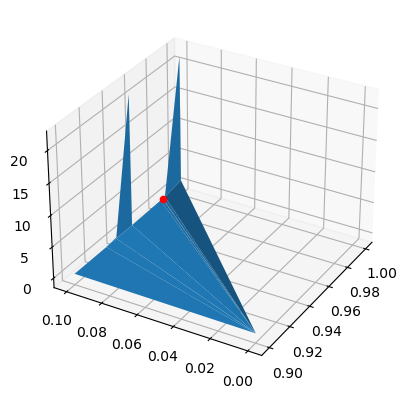

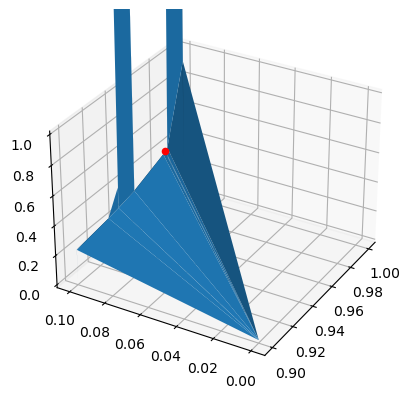

In [8]:
#graphs

model = HouseholdSpecializationModelClass()

model.estimate()

model.graphics_unlimited()

model.graphics_limited()

Economic Interpretation of the results:

Model fit with the data: 
Siminski and Yetsenga (2022) perform a data driven regression analysis and obtained the results beta0:0.4 and beta1:-0.1. Using our model driven approach, we obtained beta0: 0.3996 and beta1: -0.0999. Altough we used their results at a starting point for our analysis, we arrived at almost the same results which speak in favor of the specification of the model in line with the data.

Economic intepretation of beta0 and beta1:
If the ratio log(HF/HM) is negative, men work relatively more at home than women. Analogue implications hold for a positive ratio.

beta0:
For a positve beta0 women work c.p. relatively more than men at home. Vice versa holds for a negative beta0. Accordingly, an increase in beta0 translates into an extend of home working hours for women relative to men. As our model implies a beta0 of 0.3996 we conclude that generally women tend to work relatively more at home than men. The realisation of 0.4 shows the extent of this effect.

beta1: 
The estimate of beta1 shows to what extent the log(wF/wM) influences the realisation of log(HF/HM). For a beta1 of 0 the log ratio between the wages has no effect on the log ratio of wages. According to our model we arrive at a negative beta1 of -0.0999 which suggest that an relative increase in wages for women leads to a relative decrease of women's home working ours. This behavior could correspond to the so-called "income effect". Hence an increase in the relative wage for women implys that they have to work less at home to receive the same amount of income prior to the change. Consequently they choose to decrease the home working hours what in turn reduces the log ratio of wages.

# Question 5


In [9]:
# Question 5

# To implement the assumption of men and women being equally productive, we fix alpha at 0.5

model = HouseholdSpecializationModelClass()

model.par.alpha = 0.5

model.estimate_fixed_alpha()

# Print the optimal values of alpha and sigma
print("The values are: Alpha = ", model.par.alpha, "and Sigma = ", model.par.sigma)
print("We arrive at: beta0 = ", model.sol.beta0, "and beta1 = ", model.sol.beta1)


The values are: Alpha =  0.5 and Sigma =  0.4
We arrive at: beta0 =  0.05615095483813765 and beta1 =  -0.3724164613215601


If Alpha is fixed at 0.5, the optimization cannot produce the desired values for beta0 and beta1, no matter what sigma is chosen. Thus, the assumption of equally productive home production cannot be used to replicate Siminski and Yetsenga's results.